In [3]:
using Pkg
Pkg.activate(".")
Pkg.instantiate()

using DataFrames, Statistics, LaTeXStrings, GraphIO, GraphPlot, Graphs, PyPlot, SNAPDatasets, StatsBase

using PyPlot: grid as grd
color_list = ["#7fc97f","#beaed4","#fdc086","#ffff99","#386cb0"]
rc("font", size=14)
rc("mathtext", fontset="cm")
rc("legend", title_fontsize=12)

using Revise

includet("GrapevineModel.jl")
using .GrapevineModel

  Activating project at `~/projects/network-learning`


In [49]:
data = Dict()
t = 0.01:0.01:0.99
N = length(t)
theta = 0.5

for d in 1:10
    data[d] = zeros(N, N)
    
    for i in 1:N, j in 1:N
        mu01 = t[i]
        mu10 = t[j]
        data[d][i, j] = GrapevineModel.posterior(theta, [1], [d], mu10, mu01) - GrapevineModel.posterior(theta, [0], [d], mu10, mu01)
    end
end

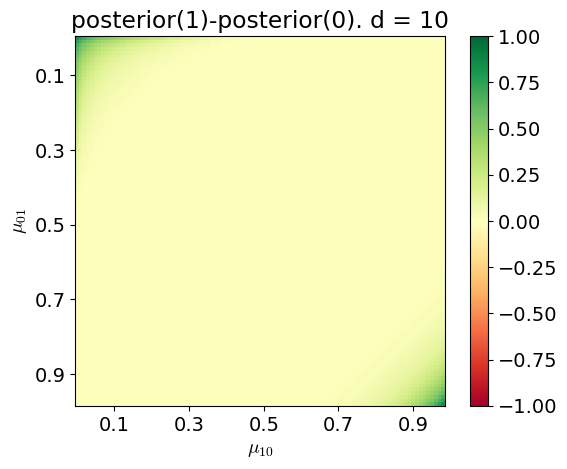

In [54]:
for d in 1:10
    clf()
    imshow(data[d], cmap="RdYlGn", vmin=-1, vmax=1)
    colorbar()
    ylabel(L"\mu_{01}")
    xlabel(L"\mu_{10}")
    title("posterior(1)-posterior(0). d = $d")
    xticks(10:20:N, t[10:20:end])
    yticks(10:20:N, t[10:20:end])
    
    savefig("figs/heatmaps/single_learner_d$d.png")
    
end